# Searching for Boba: Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API

Mark Bauer

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('boba-nyc.csv')

df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)


In [3]:
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
392,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,Tbaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","['pickup', 'delivery']",NaN,"{'address1': '135-52 Roosevelt Ave', 'address2...",NaN,NaN,15054.917573,40.759357,-73.830396,POINT (-73.83039599999999 40.759357)
393,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],NaN,"{'address1': '37-11 Main St', 'address2': '', ...",NaN,NaN,15147.410738,40.761312,-73.830812,POINT (-73.8308122 40.7613116)
394,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,NaN,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],NaN,"{'address1': '122 Mulberry St', 'address2': No...",1.212967e+10,(212) 966-6206,1414.238245,40.717810,-73.997950,POINT (-73.99795 40.71781)
395,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],$,"{'address1': '135-36 40th Rd', 'address2': '',...",NaN,NaN,15045.970192,40.758751,-73.830162,POINT (-73.830162 40.7587509)
396,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],$,"{'address1': '135-24 40th Rd', 'address2': '',...",1.718887e+10,(718) 886-9200,14997.842205,40.758500,-73.830640,POINT (-73.83064 40.7585)


In [4]:
rows, columns = df.shape
print('number of rows: {}\nnumber of columns: {}'.format(rows, columns))

number of rows: 397
number of columns: 19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             397 non-null    object 
 1   alias          397 non-null    object 
 2   name           397 non-null    object 
 3   image_url      392 non-null    object 
 4   is_closed      397 non-null    bool   
 5   url            397 non-null    object 
 6   review_count   397 non-null    int64  
 7   categories     397 non-null    object 
 8   rating         397 non-null    float64
 9   coordinates    397 non-null    object 
 10  transactions   397 non-null    object 
 11  price          254 non-null    object 
 12  location       397 non-null    object 
 13  phone          350 non-null    float64
 14  display_phone  350 non-null    object 
 15  distance       397 non-null    float64
 16  latitude       397 non-null    float64
 17  longitude      397 non-null    float64
 18  geometry  

In [6]:
df.isnull().sum().sort_values(ascending=False)

price            143
display_phone     47
phone             47
image_url          5
id                 0
transactions       0
longitude          0
latitude           0
distance           0
location           0
coordinates        0
alias              0
rating             0
categories         0
review_count       0
url                0
is_closed          0
name               0
geometry           0
dtype: int64

In [7]:
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,397.000000,397.000000,3.500000e+02,397.000000,397.000000,397.000000
mean,91.947103,3.989924,1.610915e+10,8842.775539,40.716455,-73.943691
std,117.369828,0.588097,2.396727e+09,5531.159717,0.058249,0.081600
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,20.000000,3.500000,1.347731e+10,4040.343973,40.689812,-73.994710
50%,52.000000,4.000000,1.718275e+10,8210.929458,40.732567,-73.973940
75%,117.000000,4.500000,1.718887e+10,12579.578944,40.757323,-73.883093
max,739.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [8]:
df.describe(include=['O']).T

,count,unique,top,freq
id,397,397,Q3fmTHT7zilDWtfzLK9lMA,1
alias,397,397,truedan-new-york-3,1
name,397,259,Kung Fu Tea,26
image_url,392,392,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,1
url,397,397,https://www.yelp.com/biz/truedan-new-york-3?ad...,1
categories,397,172,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",110
coordinates,397,391,"{'latitude': 40.60413, 'longitude': -73.99715}",2
transactions,397,5,"['delivery', 'pickup']",171
price,254,3,$,170
location,397,394,"{'address1': '90-15 Queens Blvd', 'address2': ...",2


In [9]:
print('id is unique: {}'.format(df['id'].is_unique))

id is unique: True


In [10]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)


In [11]:
names = df['name'].value_counts().reset_index()
names.columns = ['name', 'counts']

names.head()

,name,counts
0,Kung Fu Tea,26
1,Gong Cha,23
2,Vivi Bubble Tea,19
3,Möge Tee,9
4,CoCo Fresh Tea & Juice,6


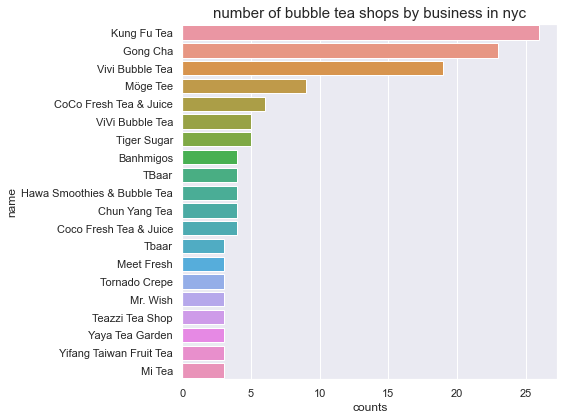

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="counts", 
            y="name", 
            data=names.head(20), 
            ax=ax)

plt.title('number of bubble tea shops by business in nyc', fontsize=15)
plt.tight_layout()

In [13]:
review_count_df = df.groupby(by='name')['review_count'].mean().sort_values(ascending=False)
review_count_df = round(review_count_df, 2)
review_count_df = review_count_df.reset_index()

review_count_df.head()

,name,review_count
0,Ten Ren's Tea Time,651.00
1,Hanco's,517.33
2,Ajisen Ramen,431.00
3,Teado Tea Shop,423.00
4,520iFCha Dessert Bar,352.00


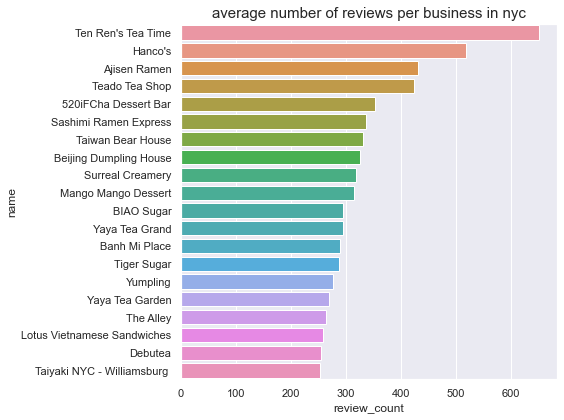

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="review_count", 
            y="name", 
            data=review_count_df.head(20), 
            ax=ax)

plt.title('average number of reviews per business in nyc', fontsize=15)
plt.tight_layout()

In [15]:
most_reviewed = df.sort_values(by='review_count', ascending=False).head(20)

most_reviewed.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
178,bn0zZ9nT_j1INOwfpxWmEw,tiger-sugar-flushing,Tiger Sugar,https://s3-media3.fl.yelpcdn.com/bphoto/Psre6b...,False,https://www.yelp.com/biz/tiger-sugar-flushing?...,739,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75922023369396, 'longitude': -...","['pickup', 'delivery']",$$,"{'address1': '40-10 Main St', 'address2': 'Ste...",1.347732e+10,(347) 732-4001,15055.920826,40.759220,-73.830305,POINT (-73.83030496537685 40.75922023369396)
89,NqnYnZtajJ4Y-Lmxa26VdA,hancos-brooklyn,Hanco's,https://s3-media1.fl.yelpcdn.com/bphoto/ggIqWD...,False,https://www.yelp.com/biz/hancos-brooklyn?adjus...,702,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.6870318621828, 'longitude': -7...","['pickup', 'delivery']",$,"{'address1': '134 Smith St', 'address2': '', '...",1.718859e+10,(718) 858-6818,2073.182530,40.687032,-73.990429,POINT (-73.9904292380982 40.6870318621828)
53,WxNlqGSsj_2TCodkx9Sa4A,vivi-bubble-tea-new-york-6,Vivi Bubble Tea,https://s3-media2.fl.yelpcdn.com/bphoto/Fw3SYB...,False,https://www.yelp.com/biz/vivi-bubble-tea-new-y...,658,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.715099, 'longitude': -73.997535}","['pickup', 'delivery']",$,"{'address1': '49 Bayard St', 'address2': '', '...",1.212567e+10,(212) 566-6833,1114.073275,40.715099,-73.997535,POINT (-73.997535 40.715099)
49,SqVHETmH6bf3rPKmdftvvw,ten-rens-tea-time-new-york-2,Ten Ren's Tea Time,https://s3-media1.fl.yelpcdn.com/bphoto/UChdn5...,False,https://www.yelp.com/biz/ten-rens-tea-time-new...,651,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.7163819, 'longitude': -73.9982...",['delivery'],$$,"{'address1': '73 Mott St', 'address2': '', 'ad...",1.212733e+10,(212) 732-7178,1261.450313,40.716382,-73.998268,POINT (-73.99826830000001 40.7163819)
298,ZLo3HRSSvN--Mw4eCBLxCg,mango-mango-dessert-flushing-3,Mango Mango Dessert,https://s3-media4.fl.yelpcdn.com/bphoto/9zl6pk...,False,https://www.yelp.com/biz/mango-mango-dessert-f...,617,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.0,"{'latitude': 40.7603809317017, 'longitude': -7...","['delivery', 'pickup']",$,"{'address1': '136-28 39th Ave', 'address2': ''...",1.917563e+10,(917) 563-1847,15199.500511,40.760381,-73.829452,POINT (-73.8294516357502 40.7603809317017)


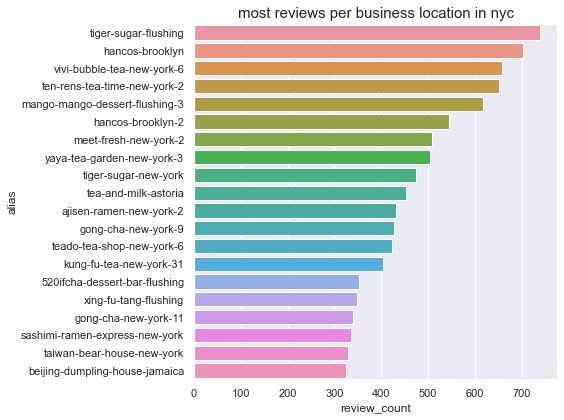

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="review_count", 
            y="alias", 
            data=most_reviewed, 
            ax=ax)

plt.title('most reviews per business location in nyc', fontsize=15)
plt.tight_layout()

In [17]:
df['rating'].describe()

count    397.000000
mean       3.989924
std        0.588097
min        1.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

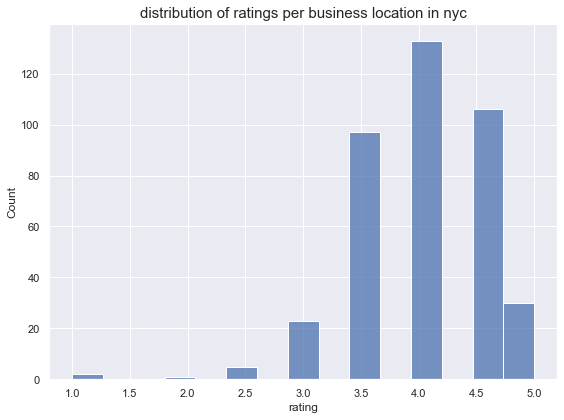

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=df, 
             x="rating")

plt.title('distribution of ratings per business location in nyc', fontsize=15)
plt.tight_layout()

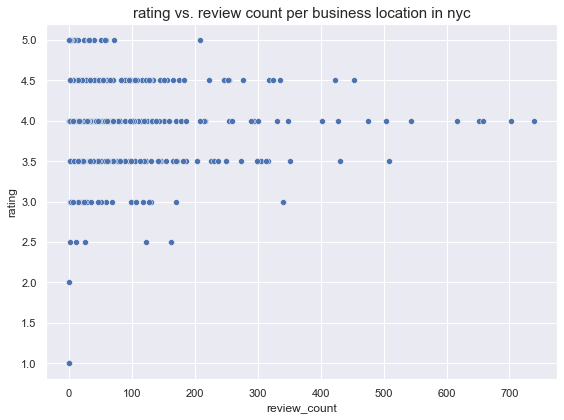

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=df, 
                x="review_count", 
                y="rating", 
                ax=ax)

plt.title('rating vs. review count per business location in nyc', fontsize=15)
plt.tight_layout()

In [20]:
price_df = df['price'].dropna().value_counts()
price_df = price_df.reset_index()
price_df.columns = ['price', 'counts']

price_df.head()

,price,counts
0,$,170
1,$$,83
2,$$$$,1


In [21]:
price_df['price'] = price_df['price'].str.count('\\$')

price_df

,price,counts
0,1,170
1,2,83
2,4,1


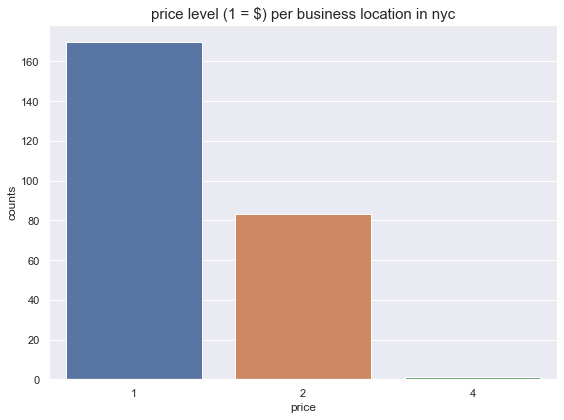

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(y="counts", 
            x="price", 
            data=price_df, 
            ax=ax)

plt.title('price level (1 = $) per business location in nyc', fontsize=15)
plt.tight_layout()

In [23]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)

neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [24]:
neighborhoods.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

Transform CRS coordinates to avoid the following warning during spatial join:  
`UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.`

_References_:

[Finding distance of consecutive points in a GeoPandas data frame](https://gis.stackexchange.com/questions/347732/finding-distance-of-consecutive-points-in-a-geopandas-data-frame)

[geopandas.GeoDataFrame.to_crs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html)

In [25]:
neighborhoods.to_crs('EPSG:4326', inplace = True)

In [26]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)


In [28]:
gdf = gpd.GeoDataFrame(df, crs=4326,
      geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.98454 40.72060)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919 40.73552)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)


In [29]:
join_df = gpd.sjoin(gdf, 
                    neighborhoods, 
                    predicate='intersects') 

join_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,-73.996220,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
21,DbhBca8LzskjS0B-L4QfZg,tiger-sugar-new-york,Tiger Sugar,https://s3-media3.fl.yelpcdn.com/bphoto/5wNVyj...,False,https://www.yelp.com/biz/tiger-sugar-new-york?...,475,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.717151, 'longitude': -73.998231}",...,-73.998231,POINT (-73.99823 40.71715),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
28,bxCjNLVDQggNTbpviV0RMw,lazy-sundaes-new-york-4,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/iDul5E...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,61,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7189689, 'longitude': -74.0006...",...,-74.000677,POINT (-74.00068 40.71897),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
63,jsJdz6pvyYZjtut9vkUwBw,yaya-tea-grand-new-york-2,Yaya Tea Grand,https://s3-media2.fl.yelpcdn.com/bphoto/iutBCc...,False,https://www.yelp.com/biz/yaya-tea-grand-new-yo...,294,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7192268371582, 'longitude': -7...",...,-73.996277,POINT (-73.99628 40.71923),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
69,uge-Lp_kY1J6Z4CzzceULw,honestea-new-york,Honestea,https://s3-media1.fl.yelpcdn.com/bphoto/77X7Xd...,False,https://www.yelp.com/biz/honestea-new-york?adj...,97,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",3.5,"{'latitude': 40.71789, 'longitude': -73.99692}",...,-73.996920,POINT (-73.99692 40.71789),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527


In [30]:
join_df = join_df.groupby(by='ntaname')['id'].count().sort_values(ascending=False)
join_df = join_df.reset_index()

join_df.columns = ['nta_name', 'counts']

join_df.head()

,nta_name,counts
0,Flushing,39
1,Chinatown,25
2,Sunset Park East,22
3,Hunters Point-Sunnyside-West Maspeth,17
4,Elmhurst,17


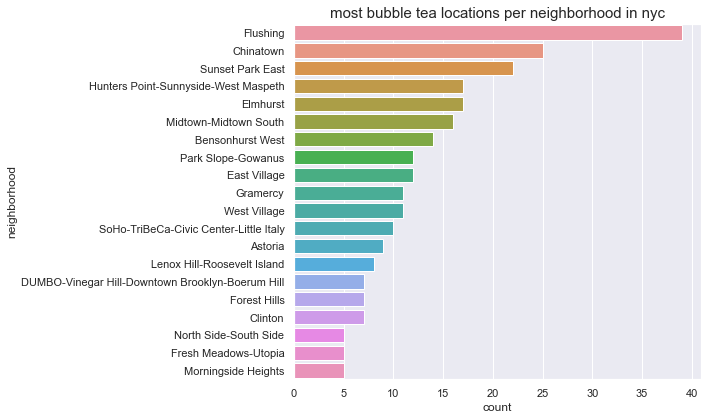

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="counts", 
            y="nta_name", 
            data=join_df.head(20), 
            ax=ax)

plt.title('most bubble tea locations per neighborhood in nyc', fontsize=15)
plt.ylabel('neighborhood')
plt.xlabel('count')

plt.tight_layout()
plt.savefig('busineses-per-neighborhood.png', dpi=200)